Statistics refer to the mathematics and techniques with which we unsderstand data

In [74]:
# One obvius description of any dataset is simply the data itself
num_friends = [100,4,2,9,5,5,45,5,3,7,2,5,9,2,5,3]*3

For larger dataset we use statistics to communicate relevant features out of the data

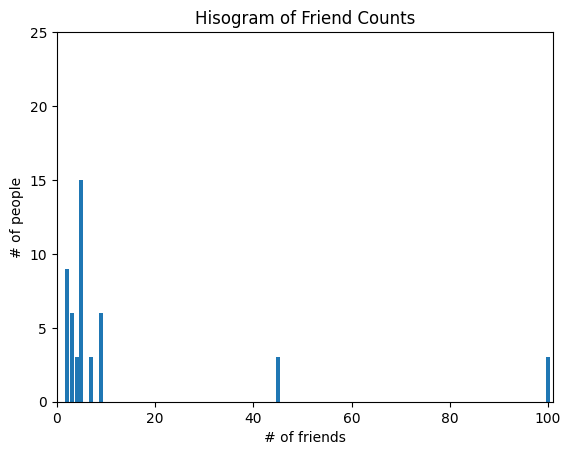

In [75]:
from collections import Counter
import matplotlib.pyplot as plt
friends_count = Counter(num_friends)
xs = range(101) # largest values is 100
ys = [friends_count[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Hisogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [76]:
num_points = len(num_friends)
larger_value = max(num_friends)
smallest_value = min(num_friends)

In [77]:
print(larger_value)
print(smallest_value)

100
2


In [78]:
sorted_values = set(num_friends)
list_friends = sorted(list(sorted_values))
smallest_value = list_friends[0]
second_smallest = list_friends[1]

In [79]:
print(smallest_value)
print(second_smallest)

2
3


### Central Tendencies
Usually we'll want some notion of where our data is centered. Most commonly we use the average (mean)

In [80]:
def mean(friends):
    return sum(friends)/len(friends)

In [81]:
mean(num_friends)

13.1875

In [95]:
# Median -> Is the middle-most value (if the number of data points is odd) o the average of the middle-most values (if the number of data points is even)

def median(friends):
    sorted_friends = sorted(friends)
    high_middle = len(sorted_friends) // 2
    if (len(friends) % 2):
        return sorted_friends[high_middle]
    else:
        return (sorted_friends[high_middle -1 ] + sorted_friends[high_middle] ) / 2



In [98]:
assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2+9)/2

In [99]:
print(median(num_friends))

5.0


A generalization of the median is the quantile which represents the value under which a certain perfcentile of the daa lies. (The median represents the value under which 50% of the data lies)

In [103]:
# p -> Represents the pth- percentile value chosen
def quantile(xs, p) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]
print(quantile(num_friends,0.10))
print(quantile(num_friends,0.25))
print(quantile(num_friends,0.75))
print(quantile(num_friends,0.90))


2
3
9
45


In [114]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i,count in counts.items() if count==max_count]


mode(num_friends)

[5]

### Dispersion
It refers to measures of how spread our data is. If our value is near 0 then is almost not spread at all.
And which large values (whatever that means) it represents very spread out values.

In [116]:
# Range. The range doesn't really depende on the whole dataset. Only in the extrems
def data_range(xs):
    return max(xs) - min(xs)

data_range(num_friends)

98

In [147]:
# Variance
import numpy as np

def demean(xs):
    x_bar = mean(xs)
    return [x_i - x_bar for x_i in xs]

def variance(xs):
    n = len(xs)
    deviations = demean(xs)
    return ((np.array(deviations) **2).sum()) /(n-1)
    

In [149]:
variance(num_friends)


614.3257978723404

In [150]:
# standard deviation. Is the root squared of the variance
def standard_deviation(xs):
    array = np.array(xs)
    return np.sqrt(array)

standard_deviation(num_friends)

array([10.        ,  2.        ,  1.41421356,  3.        ,  2.23606798,
        2.23606798,  6.70820393,  2.23606798,  1.73205081,  2.64575131,
        1.41421356,  2.23606798,  3.        ,  1.41421356,  2.23606798,
        1.73205081, 10.        ,  2.        ,  1.41421356,  3.        ,
        2.23606798,  2.23606798,  6.70820393,  2.23606798,  1.73205081,
        2.64575131,  1.41421356,  2.23606798,  3.        ,  1.41421356,
        2.23606798,  1.73205081, 10.        ,  2.        ,  1.41421356,
        3.        ,  2.23606798,  2.23606798,  6.70820393,  2.23606798,
        1.73205081,  2.64575131,  1.41421356,  2.23606798,  3.        ,
        1.41421356,  2.23606798,  1.73205081])

### Correlation 
Firts -> covariance. Variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from the mean

In [155]:
def covariance(xs,ys):
    return np.dot(xs,ys)/len(xs)-1


### Simpson's paradox
Correlations can be misleading when confounding variables are ignored. The only real way to avoid this is by knowing your data.